<a href="https://colab.research.google.com/github/georgeloizouu/GeorgeLoizou.github.io/blob/main/FNGvsMHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using this notebook to establish the relationship between Crypto Fear and Greed Index and the Covid19 Media Hype Index

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [7]:
from sklearn.preprocessing import PolynomialFeatures


In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [9]:
project=pd.read_csv('fngvsmhiregressiondata.csv')


In [10]:
from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(x=project.dropna()['MHI'], y=project.dropna()['fngvalue'])
print('R² = ',np.round(rvalue**2,2))

R² =  0.22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Text(55, 70, '$R^2$=0.22')

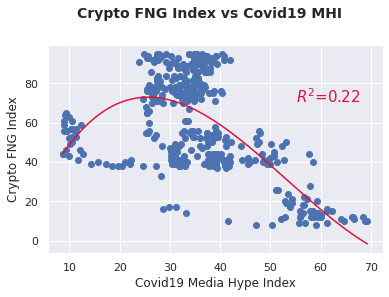

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('Crypto FNG Index vs Covid19 MHI', fontsize=14, fontweight='bold')
x = project.dropna()['MHI']
y = project.dropna()['fngvalue']
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('Covid19 Media Hype Index')
plt.ylabel('Crypto FNG Index')
ax.text(55, 70, r'$R^2$=0.22', fontsize=15, color='crimson')